In [69]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from sklearn.model_selection import train_test_split

In [70]:
file_path = []
for file in os.listdir("textdata"):
    if file.endswith(",0).txt"):
        file_path.append(os.path.join("textdata", file))
for file in os.listdir("textdata/TextData"):
    if file.endswith('.txt'):
        file_path.append(os.path.join("textdata/TextData", file))

In [71]:
file_path

['textdata\\(-12.33,0).txt',
 'textdata\\(-15.54,0).txt',
 'textdata\\(-3.04,0).txt',
 'textdata\\(-6.10,0).txt',
 'textdata\\(-9.19,0).txt',
 'textdata\\(12.33,0).txt',
 'textdata\\(15.54,0).txt',
 'textdata\\(3.04,0).txt',
 'textdata\\(6.10,0).txt',
 'textdata\\(9.19,0).txt',
 'textdata/TextData\\(-1,0).txt',
 'textdata/TextData\\(-2,0).txt',
 'textdata/TextData\\(-3,0).txt',
 'textdata/TextData\\(-4,0).txt',
 'textdata/TextData\\(-5,0).txt',
 'textdata/TextData\\(0,0).txt',
 'textdata/TextData\\(1,0).txt',
 'textdata/TextData\\(2,0).txt',
 'textdata/TextData\\(3,0).txt',
 'textdata/TextData\\(4,0).txt',
 'textdata/TextData\\(5,0).txt']

In [90]:
class Preprocessing():
    def __init__(self, path):
        self.path = path
        self.csv = pd.read_csv(path, sep='\t', header=None)
        self.sig = np.array(self.csv[1].values)
        
    def resample(self, sr=128):
        sec = len(self.sig)/1000
        num_sample = int(sec * sr)
        
        return signal.resample(self.sig, num_sample)
    
    def drop(self, sig, sec=2, sr=128):
        cut_sig = []

        cut_sig.append(sig[int(sec * sr):-int(sec * sr)])

        return np.array(cut_sig).T

    def cutt(self):
        sig = self.drop(self.resample())
 
        signal1 = sig
        self.signal1= signal1
        diff1 = (signal1[1:] - signal1[:-1])
                
        diff = abs(diff1)
        idx = np.where(diff>np.quantile(diff, 0.93))[0]
        idx_diff = idx[1:] - idx[:-1]
        
        #Slicing
        id_sum = 0
        id_ = []
        for i, idx_indiv in enumerate(idx_diff):
            id_sum += idx_indiv

            if id_sum > 100:
                id_.append(i+1)
                id_sum = 0

        idx_result = idx[id_]   
        
        #Labeling
        x_label, y_label = self.path.split('\\(')[-1].split(')')[0].split(',')
        x_label = np.float64(x_label[0:])
        print(x_label)        
        if 'TextData' in self.path:
            x_label = int(x_label)
            
        else:
            if x_label == 3.04:
                x_label = 1
            elif x_label == 6.10:
                x_label = 2
            elif x_label == 9.19:
                x_label = 3
            elif x_label == 12.33:
                x_label = 4
            elif x_label == 15.54:
                x_label = 5
            elif x_label == -3.04:
                x_label = -1
            elif x_label == -6.10:
                x_label = -2
            elif x_label == -9.19:
                x_label = -3
            elif x_label == -12.33:
                x_label = -4
            elif x_label == -15.54:
                x_label = -5           

        label = x_label
        label_inversed = -label

        X = []
        y = []
        if x_label > 0:
            for i in idx_result:
                if i+44>len(sig):
                    break
                    
                if diff1[i]>0:
                    X.append(sig[i-20:i+44])
                    y.append(label)
                    
                else:
                    X.append(sig[i-20:i+44])
                    y.append(label_inversed)
                
        elif x_label < 0:
            for i in idx_result:
                if i+44>len(sig):
                    break
                    
                if diff1[i]>0:
                    X.append(sig[i-20:i+44])
                    y.append(label_inversed)
                    
                else:
                    X.append(sig[i-20:i+44])
                    y.append(label)
                    
        else:
            for i in idx_result:
                if i + 44 > len(sig):
                    break
                else:
                    X.append(sig[i-20:i+44])
                    y.append(label)
        return X, y

In [91]:
X = []
y = []
for file in file_path:
    x = Preprocessing(file)
    x_, y_ = x.cutt()
    X.extend(np.array(x_))
    y.extend(np.array(y_))
X = np.array(X)
y = np.array(y)

-12.33
-15.54
-3.04
-6.1
-9.19
12.33
15.54
3.04
6.1
9.19
-1.0
-2.0
-3.0
-4.0
-5.0
0.0
1.0
2.0
3.0
4.0
5.0


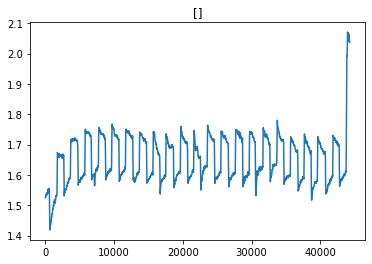

textdata\(-12.33,0).txt


In [95]:
X = []
y = []
for file in file_path:
    x = Preprocessing(file)
    X= np.array(x.sig)
    break
plt.plot(X)
plt.title(y)
plt.show()
print(file)

In [88]:
print(X.shape, y.shape)

(1847, 64, 1) (1847,)


In [89]:
np.unique(y, return_counts=True)

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 array([188, 187, 173, 164, 167,  92, 176, 160, 167, 187, 186], dtype=int64))

In [61]:
with open('X.pkl', 'wb') as f:
    pickle.dump(X, f)
with open('y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [78]:
print(X[0])
print(y[0])

[[1.58756599]
 [1.58720278]
 [1.58672523]
 [1.58597491]
 [1.58605318]
 [1.58644131]
 [1.58723121]
 [1.58802086]
 [1.58863139]
 [1.58904218]
 [1.58932199]
 [1.58948739]
 [1.58968944]
 [1.58951096]
 [1.58998876]
 [1.59077229]
 [1.59207553]
 [1.59303817]
 [1.59312602]
 [1.59276082]
 [1.59531775]
 [1.60125568]
 [1.61334589]
 [1.63009212]
 [1.65122719]
 [1.67177357]
 [1.68959183]
 [1.70194017]
 [1.710236  ]
 [1.71437479]
 [1.71621785]
 [1.71527923]
 [1.71403445]
 [1.71292423]
 [1.71340261]
 [1.7144081 ]
 [1.71550124]
 [1.71611368]
 [1.71577811]
 [1.71467916]
 [1.71317026]
 [1.71115572]
 [1.70953318]
 [1.70845185]
 [1.70782735]
 [1.70754988]
 [1.70742237]
 [1.70762971]
 [1.7097377 ]
 [1.71254471]
 [1.71563113]
 [1.71771635]
 [1.71931997]
 [1.71916273]
 [1.71887818]
 [1.71779215]
 [1.71725131]
 [1.71600367]
 [1.71566836]
 [1.71483732]
 [1.71538735]
 [1.71570241]
 [1.71651911]
 [1.71653353]]
4


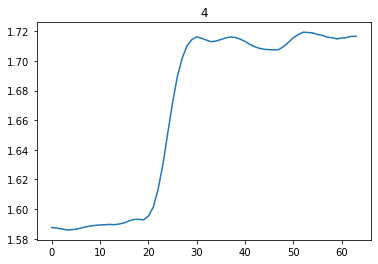

In [62]:
plt.plot(X[0])
plt.title(y[0])
plt.show()

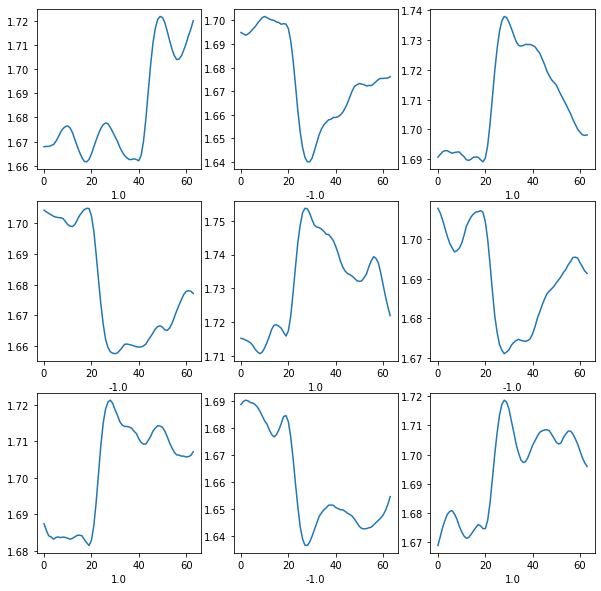

In [35]:
plt.figure(figsize=(10,10))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.plot(X[i])
    plt.xlabel(y[i])